In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('covid_19_data.csv')

In [3]:
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
5,6,1/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0
6,7,1/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2,0,0
7,8,1/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1,0,0
8,9,1/22/2020,Hainan,Mainland China,1/22/2020 17:00,4,0,0
9,10,1/22/2020,Hebei,Mainland China,1/22/2020 17:00,1,0,0


In [4]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)

In [5]:
df.head(10)

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,1/22/2020,Anhui,Mainland China,1,0,0
1,1/22/2020,Beijing,Mainland China,14,0,0
2,1/22/2020,Chongqing,Mainland China,6,0,0
3,1/22/2020,Fujian,Mainland China,1,0,0
4,1/22/2020,Gansu,Mainland China,0,0,0
5,1/22/2020,Guangdong,Mainland China,26,0,0
6,1/22/2020,Guangxi,Mainland China,2,0,0
7,1/22/2020,Guizhou,Mainland China,1,0,0
8,1/22/2020,Hainan,Mainland China,4,0,0
9,1/22/2020,Hebei,Mainland China,1,0,0


In [6]:
df.rename(columns={'ObservationDate':'Date','Province/State':'Province','Country/Region':'Country'},inplace=True)

In [7]:
df.head()

,Date,Province,Country,Confirmed,Deaths,Recovered
0,1/22/2020,Anhui,Mainland China,1,0,0
1,1/22/2020,Beijing,Mainland China,14,0,0
2,1/22/2020,Chongqing,Mainland China,6,0,0
3,1/22/2020,Fujian,Mainland China,1,0,0
4,1/22/2020,Gansu,Mainland China,0,0,0


In [8]:
 df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.head()

,Date,Province,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1,0,0
1,2020-01-22,Beijing,Mainland China,14,0,0
2,2020-01-22,Chongqing,Mainland China,6,0,0
3,2020-01-22,Fujian,Mainland China,1,0,0
4,2020-01-22,Gansu,Mainland China,0,0,0


In [10]:
df.describe()

,Confirmed,Deaths,Recovered
count,6162.000000,6162.000000,6162.000000
mean,588.957481,18.960240,220.271503
std,4908.724815,198.962911,2466.089672
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,11.000000,0.000000,0.000000
75%,100.000000,1.000000,12.000000
max,67798.000000,3099.000000,55142.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6162 non-null   datetime64[ns]
 1   Province   3700 non-null   object        
 2   Country    6162 non-null   object        
 3   Confirmed  6162 non-null   int64         
 4   Deaths     6162 non-null   int64         
 5   Recovered  6162 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 289.0+ KB


In [12]:
# df = df.fillna('NA')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6162 non-null   datetime64[ns]
 1   Province   3700 non-null   object        
 2   Country    6162 non-null   object        
 3   Confirmed  6162 non-null   int64         
 4   Deaths     6162 non-null   int64         
 5   Recovered  6162 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 289.0+ KB


In [14]:
df.head(10)

,Date,Province,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1,0,0
1,2020-01-22,Beijing,Mainland China,14,0,0
2,2020-01-22,Chongqing,Mainland China,6,0,0
3,2020-01-22,Fujian,Mainland China,1,0,0
4,2020-01-22,Gansu,Mainland China,0,0,0
5,2020-01-22,Guangdong,Mainland China,26,0,0
6,2020-01-22,Guangxi,Mainland China,2,0,0
7,2020-01-22,Guizhou,Mainland China,1,0,0
8,2020-01-22,Hainan,Mainland China,4,0,0
9,2020-01-22,Hebei,Mainland China,1,0,0


In [15]:
df2 = df.groupby('Country')[['Country','Confirmed','Deaths','Recovered']].sum().reset_index()

C:\Users\param\AppData\Local\Temp\ipykernel_1356\1465008387.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby('Country')[['Country','Confirmed','Deaths','Recovered']].sum().reset_index()


In [16]:
df2 = df.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

C:\Users\param\AppData\Local\Temp\ipykernel_1356\2448502256.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()


In [17]:
df2

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1,0,0
1,"('St. Martin',)",2020-03-10,2,0,0
2,Afghanistan,2020-02-24,1,0,0
3,Afghanistan,2020-02-25,1,0,0
4,Afghanistan,2020-02-26,1,0,0
...,...,...,...,...,...
2897,occupied Palestinian territory,2020-03-11,0,0,0
2898,occupied Palestinian territory,2020-03-12,0,0,0
2899,occupied Palestinian territory,2020-03-14,0,0,0
2900,occupied Palestinian territory,2020-03-15,0,0,0


In [18]:
df3 = df2[df2['Confirmed']>100]

In [19]:
df3

,Country,Date,Confirmed,Deaths,Recovered
152,Australia,2020-03-10,107,3,21
153,Australia,2020-03-11,128,3,21
154,Australia,2020-03-12,128,3,21
155,Australia,2020-03-13,200,3,23
156,Australia,2020-03-14,250,3,23
...,...,...,...,...,...
2763,US,2020-03-12,1663,40,12
2764,US,2020-03-13,2179,47,12
2765,US,2020-03-14,2726,54,12
2766,US,2020-03-15,3499,63,12


In [20]:
import matplotlib.pyplot as plt

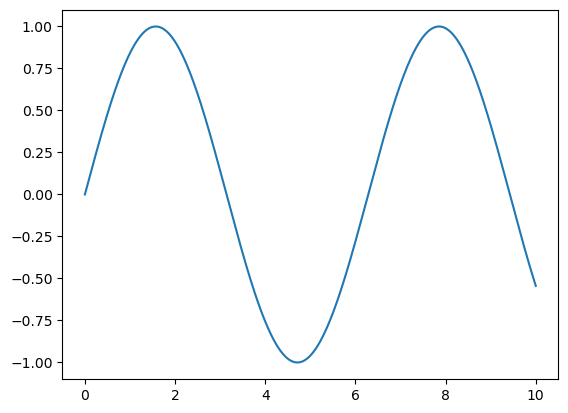

In [21]:
x = np.linspace(0,10,1000)
y = np.sin(x)
plt.plot(x,y)

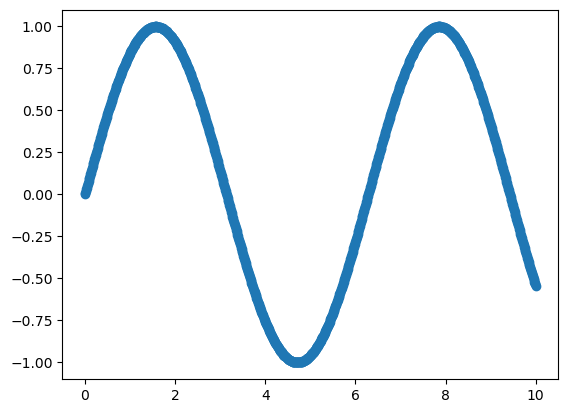

In [22]:
plt.scatter(x,y)

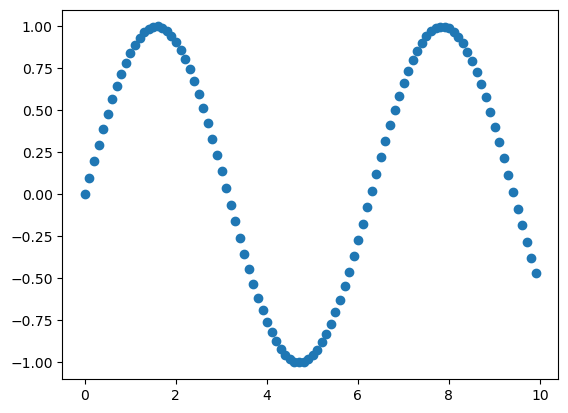

In [23]:
plt.scatter(x[::10],y[::10])

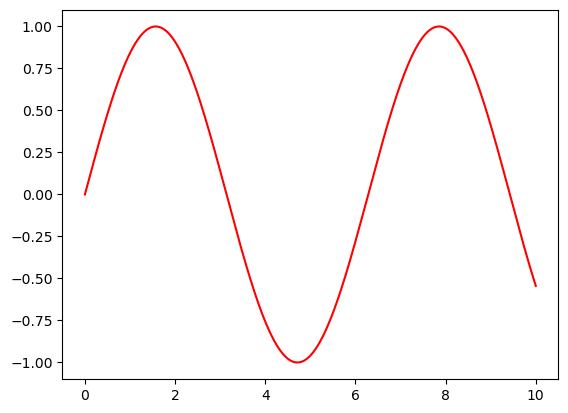

In [24]:
plt.plot(x,y,color='red')

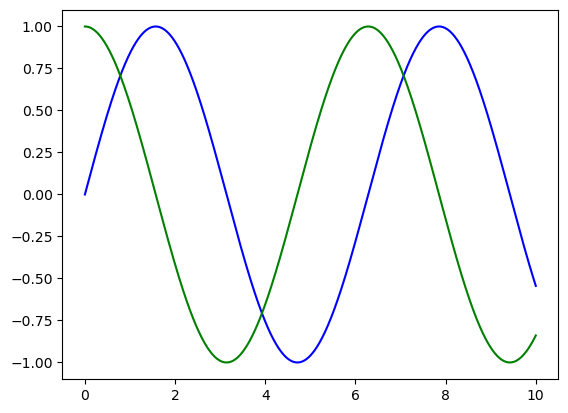

In [25]:
plt.plot(x,y,color='b')
plt.plot(x,np.cos(x),color='g')

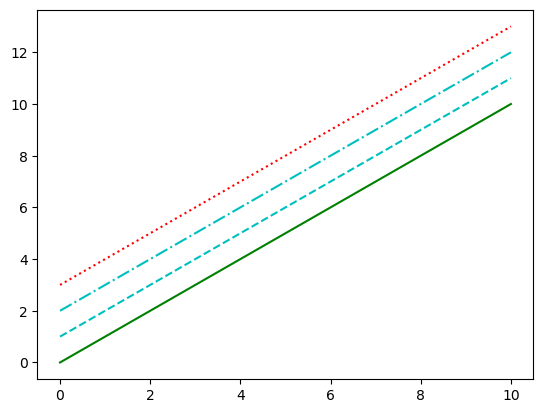

In [26]:
plt.plot(x,x+0,'-g')  # solid green
plt.plot(x,x+1,'--c') # dashed cyan
plt.plot(x,x+2,'-.c') # dash dot black
plt.plot(x,x+3,':r')  # dotted red

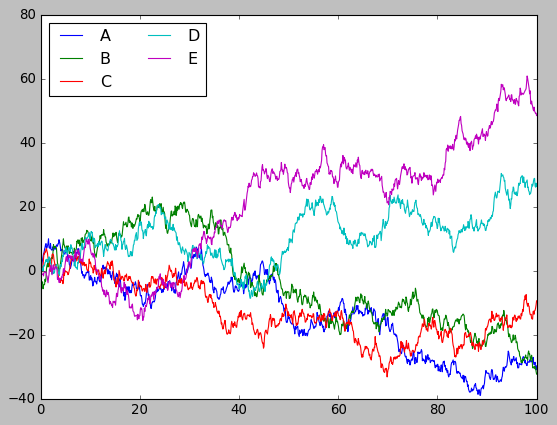

In [27]:
plt.style.use('classic')
x = np.linspace(0,100,1000)
y = np.cumsum(np.random.randn(1000,5),0)
plt.plot(x,y)
plt.legend('ABCDE', ncol=2, loc='upper left')

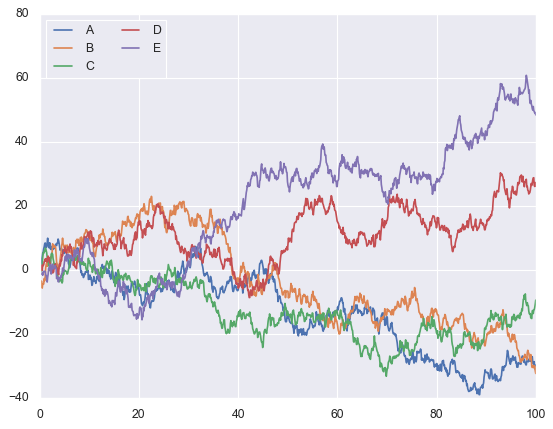

In [28]:
import seaborn as sns
sns.set()
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

(array([4.74284711e-05, 2.99392224e-04, 1.17089038e-03, 2.67970862e-03,
        3.75574205e-03, 3.60456380e-03, 2.23803098e-03, 8.12212567e-04,
        1.89713884e-04, 2.37142355e-05]),
 array([174.51968946, 241.98971174, 309.45973402, 376.92975631,
        444.39977859, 511.86980087, 579.33982315, 646.80984543,
        714.27986771, 781.74988999, 849.21991227]),
 <BarContainer object of 10 artists>)

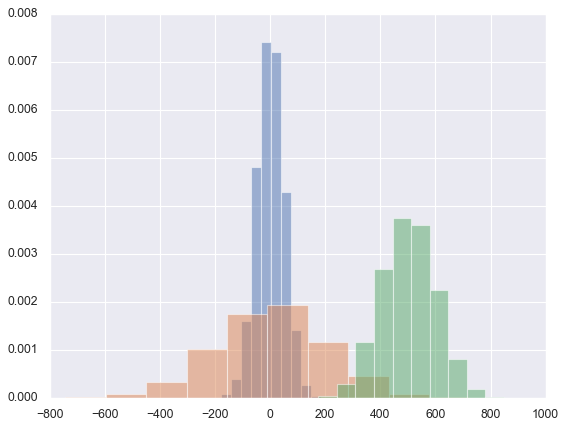

In [29]:
X = pd.Series(50*np.random.randn(5000))
Y = pd.Series(200*np.random.randn(5000))
Z = pd.Series(100*np.random.randn(5000)+500)
plt.hist(X,alpha=0.5,density=True)
plt.hist(Y,alpha=0.5,density=True)
plt.hist(Z,alpha=0.5,density=True)

C:\Users\param\AppData\Local\Temp\ipykernel_1356\1583157295.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col],shade=True)
C:\Users\param\AppData\Local\Temp\ipykernel_1356\1583157295.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col],shade=True)
C:\Users\param\AppData\Local\Temp\ipykernel_1356\1583157295.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col],shade=True)


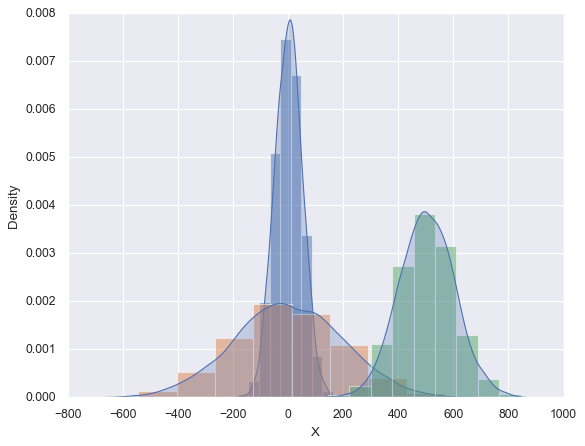

In [30]:
 sns.set()
X = pd.Series(50*np.random.randn(5000))
Y = pd.Series(200*np.random.randn(5000))
Z = pd.Series(100*np.random.randn(5000)+500)
data = pd.DataFrame({'X':X,'Y':Y,'Z':Z})
data.head()
for col in data.columns:
    plt.hist(data[col],density=True,alpha=0.5)
    sns.kdeplot(data[col],shade=True)

In [31]:
data.head()

,X,Y,Z
0,-19.274487,-57.745754,654.956605
1,28.823618,-239.568402,399.807050
2,-78.905115,210.419401,426.966298
3,-14.858625,-260.676712,266.906882
4,5.381791,75.788143,484.662320


C:\Users\param\AppData\Local\Temp\ipykernel_1356\1790529093.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\param\AppData\Local\Temp\ipykernel_1356\1790529093.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\param\AppData\Local\Temp\ipykernel_1356\1

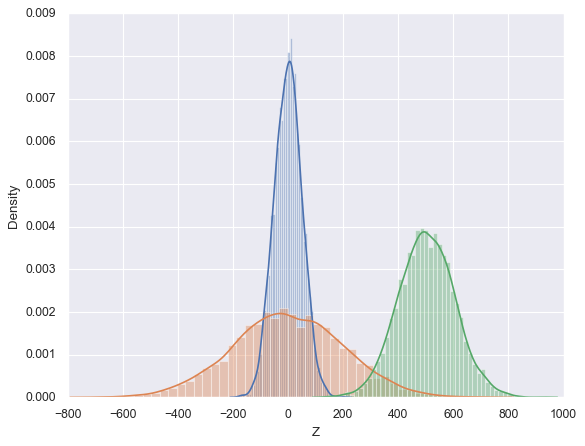

In [32]:
for col in data.columns:
    sns.distplot(data[col])

In [33]:
with sns.axes_style('white'):
    sns.jointplot("X","Y",data,kind='kde')

TypeError: jointplot() takes from 0 to 1 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

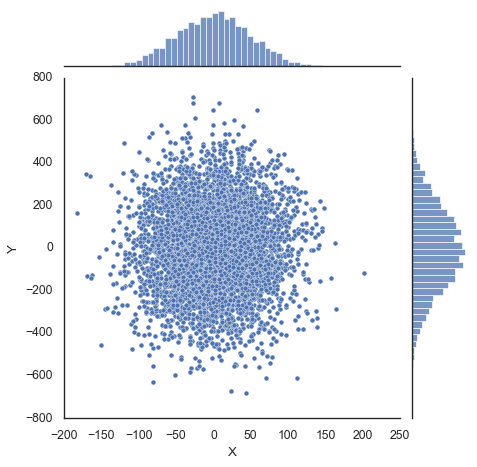

In [34]:
with sns.axes_style('white'):
    sns.jointplot(x="X", y="Y",data=data)

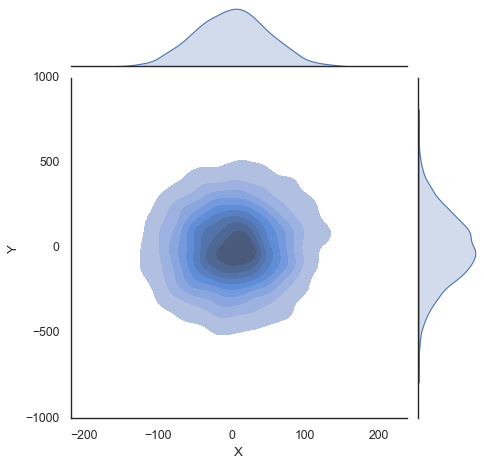

In [35]:
with sns.axes_style('white'):
    sns.jointplot(x="X", y="Y",data=data,kind='kde',fill=True)

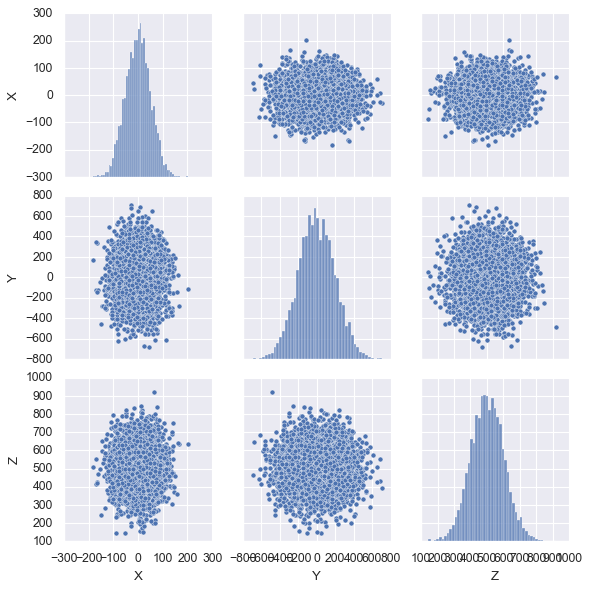

In [36]:
sns.pairplot(data)

In [37]:
iris = sns.load_dataset('iris')
iris.head(60)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [38]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [39]:
iris.shape

(150, 5)

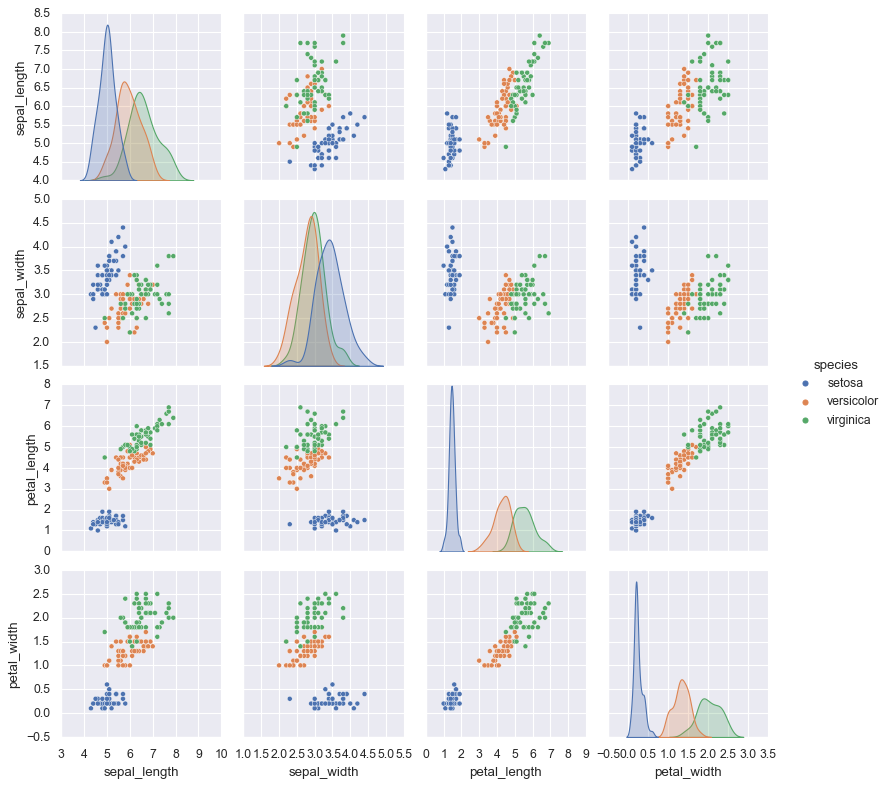

In [40]:
sns.pairplot(iris,hue='species')

In [41]:
from bokeh.plotting import figure, output_file, show

In [42]:
output_file("demo.html")
p = figure(outer_width=400,outer_height=400,title='line')
p.line([1,2,3,4,5],[6,7,8,9,10],line_width=2)
show(p)

In [43]:
output_file("demo.html")
p = figure(width=400,height=400,title='line')
p.line([1,2,3,4,5],[6,7,8,9,10],line_width=2)
show(p)

In [44]:
output_file("demo.html")
p = figure(min_width=400,min_height=400,title='line')
p.line([1,2,3,4,5],[6,7,8,9,10],line_width=2)
show(p)

In [45]:
output_file("demo.html")
p = figure(min_width=800,min_height=400,title='line')
p.line([1,2,3,4,5],[6,7,8,9,10],line_width=2)
show(p)

In [46]:
p = figure(title="Bokeh Example",x_axis_label='X', y_axis_label='Y')
x = np.linspace(0, 10, 30)
y1 = np.sin(x)
y2 = np.cos(x)
p.line(x, y1, legend_label="y=sin(x)")
p.circle(x, x, legend_label="y=x", fill_color="green",size=5)
p.line(x, y2, legend_label="y=cos(x)", line_width=3 ,line_color="red")
show(p)

In [47]:
from bokeh.plotting import figure, show
import numpy as np

p = figure(title="Bokeh Example", x_axis_label='X', y_axis_label='Y')
x = np.linspace(0, 10, 30)
y1 = np.sin(x)
y2 = np.cos(x)

# Create line glyphs and add them to the plot with legend labels
p.line(x, y1, line_color="blue", line_width=2, legend_label="y=sin(x)")
p.circle(x, x, fill_color="green", size=5, legend_label="y=x")
p.line(x, y2, line_color="red", line_width=3, legend_label="y=cos(x)")

# Add the legend to the plot
p.legend.title = "Legend"
p.legend.label_text_font_size = "10pt"
p.legend.location = "top_left"

# Show the plot
show(p)


In [48]:
p = figure(width = 800,height = 1000,title="Bokeh Example",x_axis_label='X', y_axis_label='Y')
x = np.linspace(0, 10, 30)
y1 = np.sin(x)
y2 = np.cos(x)
p.line(x, y1, legend_label="y=sin(x)")
p.circle(x, x, legend_label="y=x", fill_color="green",size=5)
p.line(x, y2, legend_label="y=cos(x)", line_width=3 ,line_color="red")
p.triangle(x,x**2,color="black")
show(p)

In [49]:
p = figure(width = 800,height = 1000,title="Bokeh Example",x_axis_label='X', y_axis_label='Y')
x = np.linspace(0, 10, 30)
y1 = np.sin(x)
y2 = np.cos(x)
p.line(x, y1, legend_label="y=sin(x)")
p.circle(x, x, legend_label="y=x", fill_color="green",size=5)
p.line(x, y2, legend_label="y=cos(x)", line_width=3 ,line_color="red")
p.square(5**x,5**x,color="black")
show(p)

In [51]:
from bokeh.layouts import gridplot
x = np.linspace(0,6*np.pi, 100)

y0 = np.sin(x)
y1 = np.cos(x)
y2 = np.sin(x) + np.cos(x)-1

s1 = figure()
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

s2 = figure()
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

s3 = figure()
s3.square(x, y2, size=10, color="olive", alpha=0.5)

p = gridplot([[s1, s2, s3]])
show(p)